In [ ]:
import threading  # Biblioteca de threads
import time       # Para pausas temporais
import random     # Para gerar tempos aleatórios

N = 5  # Número de filósofos (e garfos)

# Cria uma lista de locks (um por garfo)
garfos = [threading.Lock() for _ in range(N)]

# Função com o comportamento de cada filósofo
def filosofo(i):
    esquerda = garfos[i]               # Garfo à esquerda do filósofo i
    direita = garfos[(i + 1) % N]      # Garfo à direita (com wrap-around)

    while True:
        print(f"Filósofo {i} está pensando...")  # Estado: pensando
        time.sleep(random.uniform(0.5, 1.5))     # Espera um tempo aleatório
        print(f"Filósofo {i} está com fome.")    # Estado: com fome

        # Define a ordem de pegar os garfos para evitar deadlock
        # Filósofos pares pegam esquerda depois direita; ímpares fazem o oposto
        primeiro, segundo = (esquerda, direita) if i % 2 == 0 else (direita, esquerda)

        # Tenta pegar os dois garfos com `with`, que faz o acquire/release automático
        with primeiro:
            with segundo:
                print(f"Filósofo {i} está comendo.")  # Estado: comendo
                time.sleep(random.uniform(0.5, 1.5))  # Come por um tempo aleatório
                print(f"Filósofo {i} terminou de comer.")  # Termina de comer

# Cria e inicia as threads dos filósofos
for i in range(N):
    threading.Thread(target=filosofo, args=(i,), daemon=True).start()

time.sleep(10)  # Executa por 10 segundos antes de encerrar o programa


Filósofo 0 está pensando...
Filósofo 1 está pensando...
Filósofo 2 está pensando...
Filósofo 3 está pensando...
Filósofo 4 está pensando...
Filósofo 3 está com fome.
Filósofo 3 está comendo.
Filósofo 2 está com fome.
Filósofo 0 está com fome.
Filósofo 0 está comendo.
Filósofo 4 está com fome.
Filósofo 1 está com fome.
Filósofo 0 terminou de comer.
Filósofo 0 está pensando...
Filósofo 3 terminou de comer.
Filósofo 3 está pensando...
Filósofo 4 está comendo.
Filósofo 2 está comendo.
Filósofo 4 terminou de comer.
Filósofo 4 está pensando...
Filósofo 0 está com fome.
Filósofo 0 está comendo.
Filósofo 2 terminou de comer.
Filósofo 2 está pensando...
Filósofo 3 está com fome.
Filósofo 3 está comendo.
Filósofo 0 terminou de comer.
Filósofo 0 está pensando...
Filósofo 1 está comendo.
Filósofo 4 está com fome.
Filósofo 3 terminou de comer.
Filósofo 3 está pensando...
Filósofo 4 está comendo.
Filósofo 0 está com fome.
Filósofo 2 está com fome.
Filósofo 1 terminou de comer.
Filósofo 1 está pensan

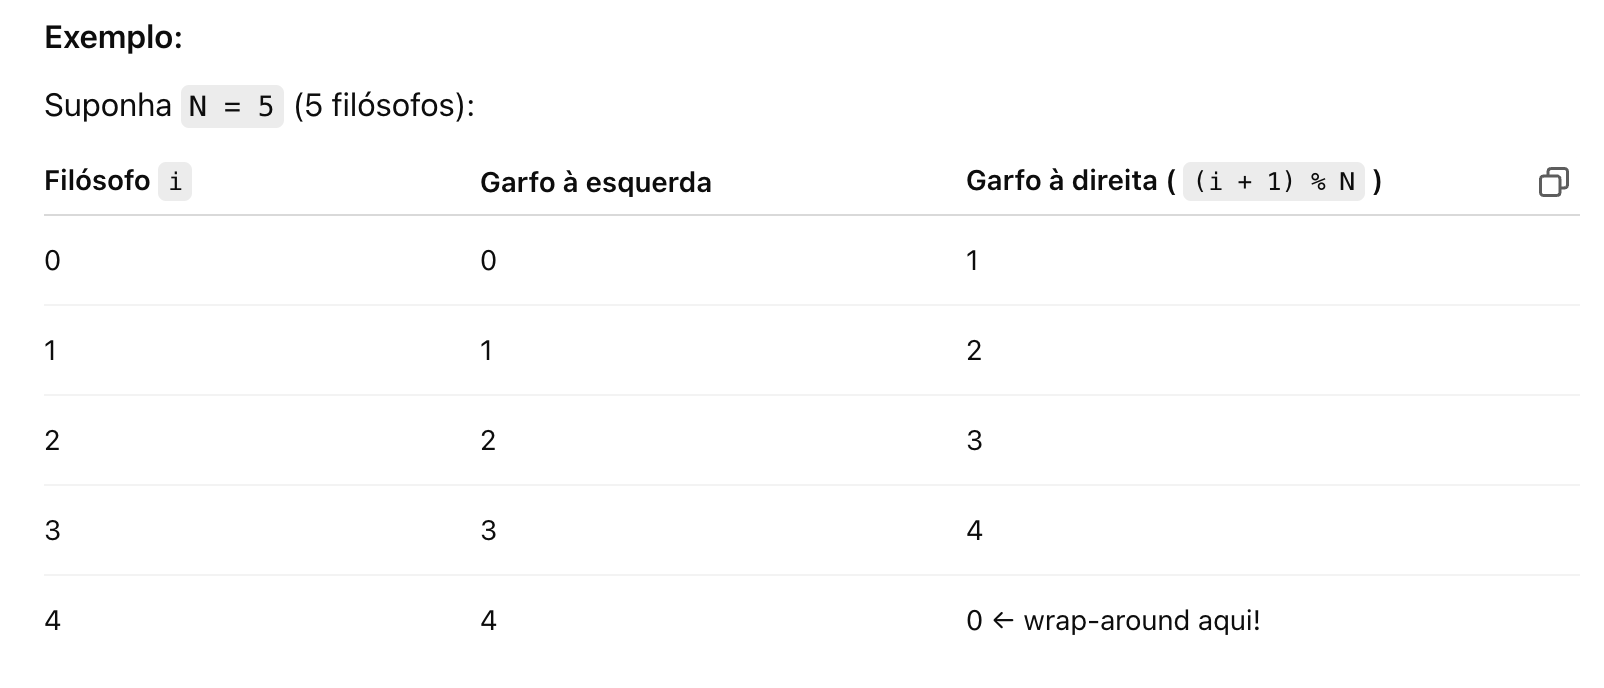